# Exploring the World of Books

### Team members: Arun Mathew, Nikki Rastogi, Aquib Hussain

# Abstract
Should write this
# Introduction to World of Books and Reviews

In a world filled with endless literary choices, it can be challenging to find the next great read. This data project, "Exploring the World of Books and Reviews," is a journey into the vast realm of literature, designed to help book enthusiasts, researchers, and readers discover new insights and trends within the literary landscape.

Our dataset contains a wealth of information, encompassing a wide range of books, each a unique treasure waiting to be explored. It includes crucial details such as book IDs, authors, original publication years, titles from csv file and language, number of pages average ratings, and extensive user reviews from Web Scraping. With this data at our fingertips, we are poised to uncover intriguing patterns, preferences, and trends that shape the world of literature.

Throughout this project, we will delve into the role of authors, original publication years, ratings and language in influencing a book's reception. We will explore how average ratings and user reviews contribute to a book's reputation and popularity. Whether you're an avid reader seeking new recommendations, a data enthusiast fascinated by book analytics, or an author looking to understand what makes a bestseller, this project offers a unique and data-driven perspective on the world of books and reviews. Join us on this literary journey, and let's explore the stories hidden within the data. 




#### The code block below loads three datasets related to books and reviews into Pandas DataFrames using pd.read_csv() function with specific URL paths.This code snippet succinctly loads three datasets into DataFrames (df, ratings_df, and user_df) by directly reading CSV files from specific URLs hosted on GitHub.


In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/nikkirastogi/Exploring-the-World-of-Books/main/BX-Books.csv",
                delimiter=";",
            encoding="latin1",
            dtype={"Year-Of-Publication": object},
            on_bad_lines='skip',
        )

df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [2]:
ratings_df = pd.read_csv("https://raw.githubusercontent.com/nikkirastogi/Exploring-the-World-of-Books/main/BX-Book-Ratings.csv",
            delimiter=";",
            encoding="latin1",
            on_bad_lines = 'skip',
            dtype={"Book-Rating": object},
            )

ratings_df.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### DATA PREPROCESSING 


In [4]:
from src.book_review.books_cleaning import BooksCleaning
cleaner = BooksCleaning(df,ratings_df)

In [5]:
cleaner.select_attributes()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [6]:
df = cleaner.merge_dfs()
df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Ratings
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,5
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,3
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,6
...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),0
271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books,0
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004.0,HarperSanFrancisco,0
271358,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press,0


### DATA SUMMARY 
From the src.book_review we are importing the data_summary which can be called as ds

In [6]:
from src.book_review.books_summary import BooksSummary
summerizer = BooksSummary(df)

Using the cleaning function from the data_summary module to clean or process the df, ratings_df, and user_df DataFrames. The cleaned or processed data is saved into a variable obj, and then exported to a CSV file named updated_dataset.csv without including the DataFrame index.

This Function is used to view all the columns in the dataset

In [7]:
summerizer.df_details()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Ratings
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,5
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,3
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,6


This Function extracts attributes from the provided obj variable for further analysis.

In [8]:
summerizer.df_attributes()

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Book-Ratings'],
      dtype='object')

This Function is used to find the info of the Dataset

In [9]:
summerizer.df_info()

<class 'pandas.core.frame.DataFrame'>
Index: 271357 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271357 non-null  object 
 1   Book-Title           271357 non-null  object 
 2   Book-Author          271355 non-null  object 
 3   Year-Of-Publication  271357 non-null  float64
 4   Publisher            271355 non-null  object 
 5   Book-Ratings         271357 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 14.5+ MB


This Function is used to find the Null Values in the Dataset

In [10]:
summerizer.df_null_values()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Book-Ratings           0
dtype: int64

This Function is used to find Shape of the dataset

In [11]:
summerizer.df_shape()

(271357, 6)

This Function is Used to describe the Dataset.

In [12]:
summerizer.df_describe()

,Year-Of-Publication,Book-Ratings
count,271357.000000,271357.000000
mean,1959.760817,2.972236
std,257.994226,3.881739
min,0.000000,0.000000
25%,1989.000000,0.000000
50%,1995.000000,0.000000
75%,2000.000000,7.000000
max,2050.000000,10.000000


This Function is used to define the Data types in the object 

### EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis (EDA) serves as the cornerstone for understanding and interpreting our extensive dataset, which encapsulates diverse book details and user-generated reviews obtained through web scraping. EDA plays a pivotal role by providing a comprehensive view of the dataset's structure, integrity, and inherent patterns. It enables us to identify relationships between crucial attributes like authors, publication years, and user ratings, shedding light on the intricate dynamics shaping literary preferences. Through visualizations and summary statistics, EDA unveils hidden trends, correlations, and insights crucial for comprehending a book's reception and popularity. This analysis is invaluable for readers seeking literary recommendations, data enthusiasts exploring book analytics, and authors deciphering bestseller dynamics, offering a data-driven perspective on the multifaceted realm of books and reviews. EDA's significance lies in its ability to guide decision-making, support further analyses, and serve as a fundamental tool for deriving meaningful conclusions from the intricate narratives woven within our expansive dataset.

Proceeding further, we are importing the EDA from src.book 

In [13]:
from src.book_review.books_eda import BooksEDA
books_analyzer = BooksEDA(df)

The function highest_publisher(obj) uses the DataFrame df to determine and visualize the top 10 publishers with the most books. It computes the frequency of each publisher's appearance in the dataset, creating a bar chart representation where each bar signifies the count of books published by these top publishers. The chart, colored in sky blue, displays the distribution of books among these publishers, offering a quick glance at the prominence of publishing houses based on their book counts. This visualization aids in swiftly identifying the major contributors to the dataset in terms of book publications. 
Here we can see that the Harlequin has the Highest count of morethan 7000 and the Warner Books has scored a count of around 2500 among the top 10 Publishers.

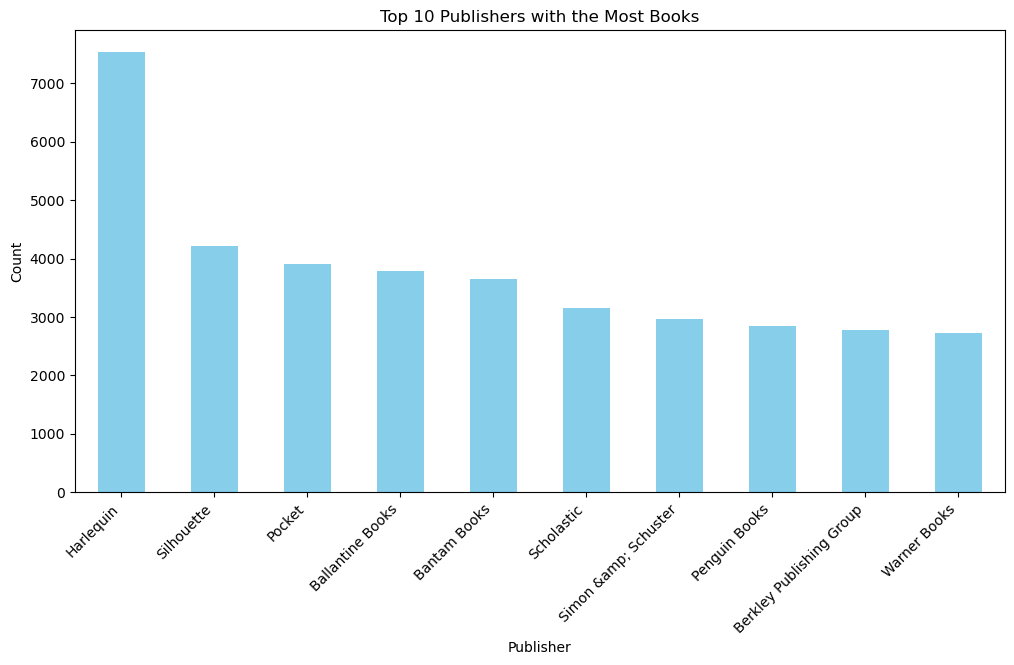

In [14]:

books_analyzer.highest_publisher()

The distribution(obj) function analyzes the publication year distribution in DataFrame df, focusing on years between 1800 and 2050. It creates a histogram displaying the count of books published in 10-year intervals within this timeframe. This plot offers a clear depiction of publication trends over time, aiding in recognizing patterns or spikes in book releases.

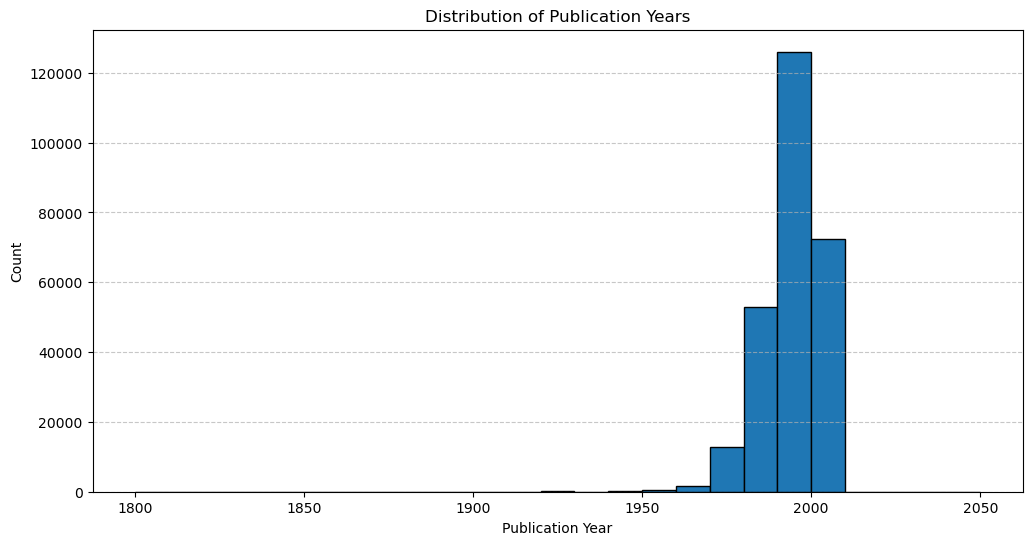

In [15]:
books_analyzer.distribution()

The df_word_cloud() function creates a visual representation known as a word cloud, depicting the distribution of book titles within the DataFrame obj. By aggregating all book titles and forming a cloud where word size corresponds to title frequency, it visually emphasizes the most common or frequently occurring titles. The function utilizes the WordCloud library to generate this representation, setting parameters for dimensions and background color. Once generated, the resulting word cloud offers a quick insight into prevalent themes or popular book titles present in the dataset, aiding in a rapid grasp of overarching trends or recurring topics among the books.

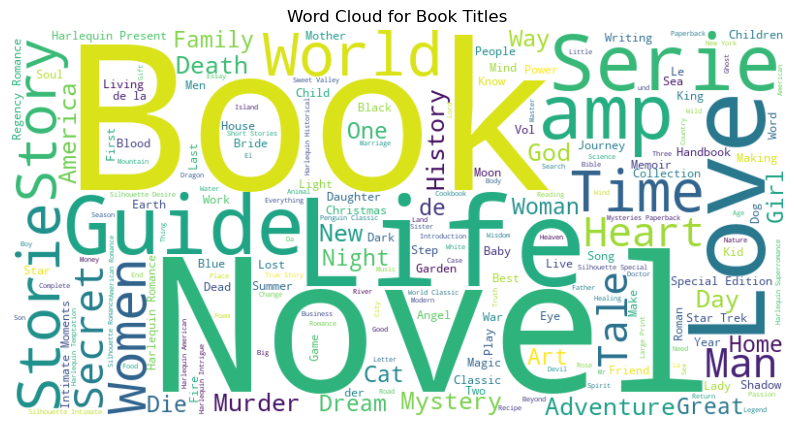

In [16]:
books_analyzer.df_word_cloud()

The highest_author(obj) function identifies and visualizes the top 10 authors with the most books in the DataFrame obj. It calculates the frequency of each author's appearance in the "Book-Author" column, generates a bar chart representing the author counts, and displays it. This visualization provides a quick overview of the most prolific authors within the dataset.The Count of Authors that is Agatha Christie is shown as the Highest and Charles Dickens the Lowest.

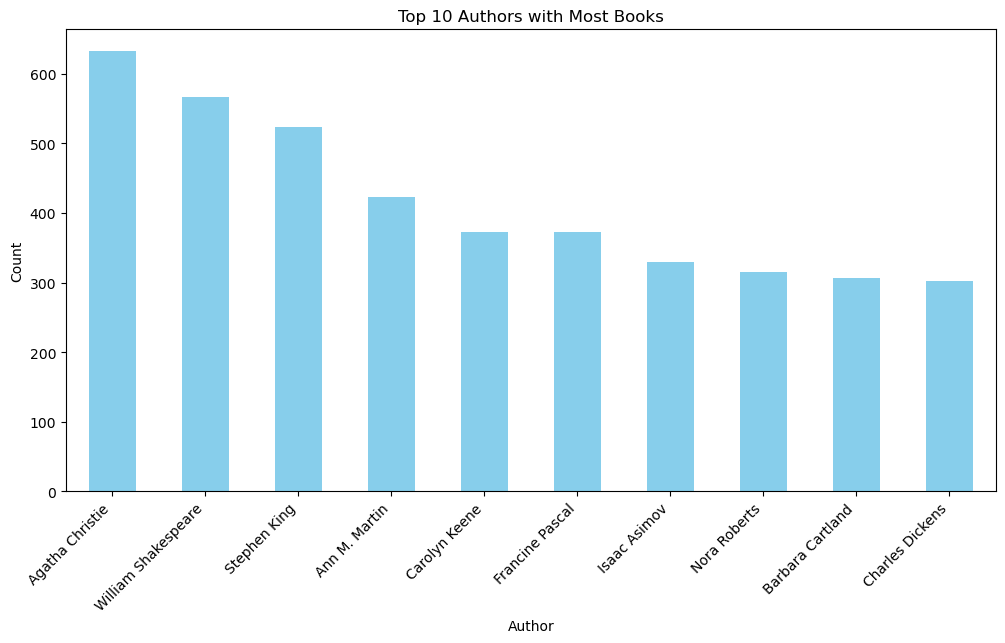

In [17]:
books_analyzer.highest_author()

The highest_ratings(obj) function focuses on the distribution of book ratings in the DataFrame obj. The Generated histogram using seaborn's histplot() function, illustrating the frequency distribution of book ratings. This visualization aids in understanding the spread and frequency of different rating values within the dataset. The Book ratings with 0 are higher for which there is a steep decline in the Frequency.

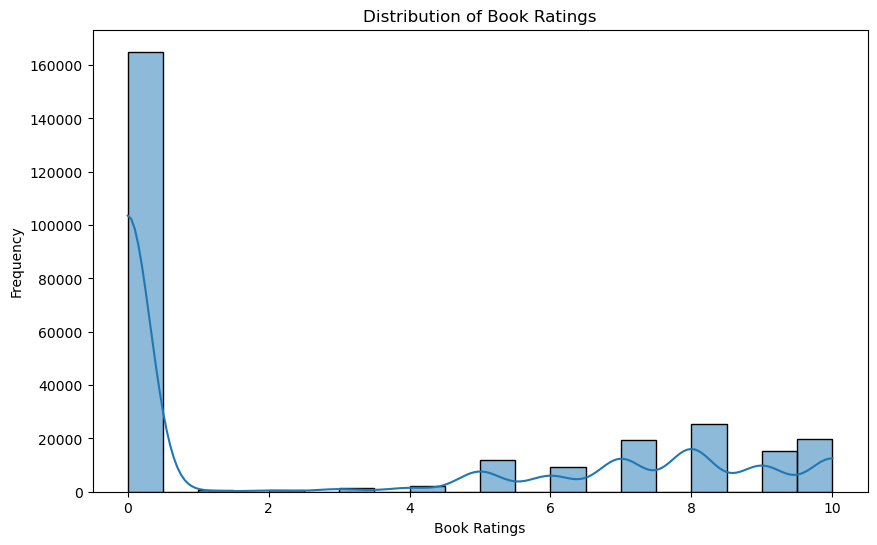

In [18]:
books_analyzer.highest_ratings()

The ratings_and_year(obj) function explores the relationship between book ratings and the year of publication in the DataFrame obj. It creates a scatter plot using seaborn's scatterplot() function, mapping the correlation, if any, between book ratings and the year of publication. This visualization helps in discerning any trends or connections between ratings and publication years.

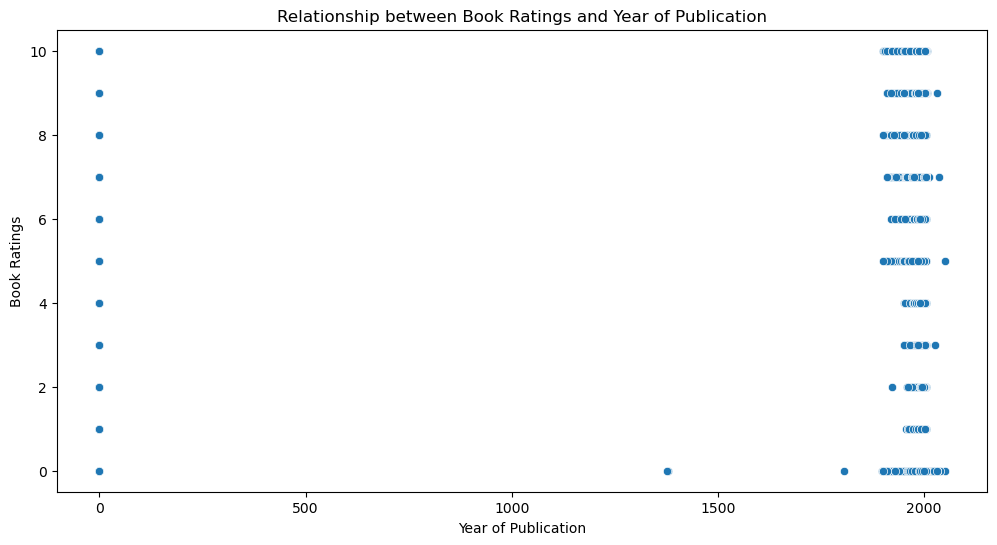

In [19]:
books_analyzer.ratings_and_year()

The ratings_per_book(Obj) function analyzes the count of ratings per book in the DataFrame obj. It employs seaborn's countplot() function to showcase the frequency of different ratings assigned to books. This visualization presents a clear distribution of ratings received by books in the dataset.

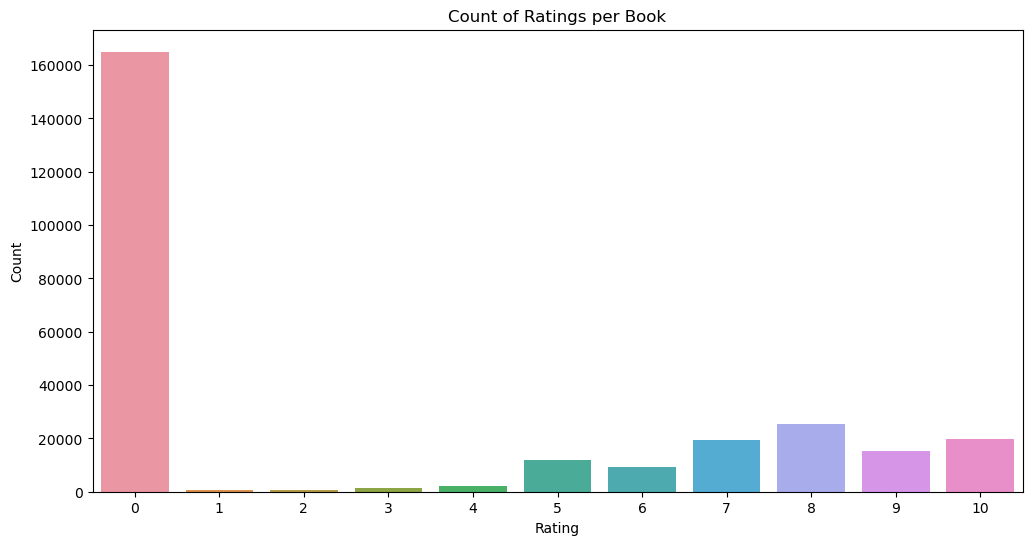

In [20]:
books_analyzer.ratings_per_book()

## WEB SCRAPING

In [22]:
from src.book_review.books_scraper import BooksScraper
import pandas as pd # Assuming your module is named book_scraper.py

# List of books to scrape
book_list = [
    "The Big Book of American Trivia",
    "Lay Down my Sword and Shield by James Lee Burke",
    "Hamlet (Wordsworth Classics)",
    "Calculating God: A Novel",
    "Plan of Attack",
    "Arcadia book by Tom Stoppard",
    "Le Colonel Chabert by Honoré de Balzac",
    "The Lake of Darkness (Vintage Crime/Black Lizard) by Ruth Rendell",
    "The Run by Stuart Woods",
    "Pandora by Anne Rice",
    "Self Analysis by L. Ron Hubbard"
]

url = "https://www.amazon.com"

# Create an instance of the AmazonBookScraper with the URL
scraper = BooksScraper(url)

# Scrape details for each book in the list
all_book_details = scraper.scrape_books(book_list)

# Print and normalize the extracted details for each book
for i, book_details in enumerate(all_book_details, start=1):
    print(f"\nDetails for Book {i} - {book_list[i-1]}:")
    print(f"Title: {book_details['title']}")
    print(f"Rating: {book_details['rating']}")
    print(f"num_user_rated: {book_details['num_user_rated']}")

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: MicrosoftEdge=120.0.2210.61)
Stacktrace:
0   msedgedriver                        0x0000000100ad7b58 msedgedriver + 4586328
1   msedgedriver                        0x0000000100acf788 msedgedriver + 4552584
2   msedgedriver                        0x00000001006c0cb8 msedgedriver + 298168
3   msedgedriver                        0x0000000100699210 msedgedriver + 135696
4   msedgedriver                        0x0000000100738e70 msedgedriver + 790128
5   msedgedriver                        0x000000010074d830 msedgedriver + 874544
6   msedgedriver                        0x00000001006ffb78 msedgedriver + 555896
7   msedgedriver                        0x00000001007011b8 msedgedriver + 561592
8   msedgedriver                        0x0000000100a99910 msedgedriver + 4331792
9   msedgedriver                        0x0000000100a9da44 msedgedriver + 4348484
10  msedgedriver                        0x0000000100a9e08c msedgedriver + 4350092
11  msedgedriver                        0x0000000100a82d28 msedgedriver + 4238632
12  msedgedriver                        0x0000000100a9e700 msedgedriver + 4351744
13  msedgedriver                        0x0000000100a753bc msedgedriver + 4182972
14  msedgedriver                        0x0000000100abd400 msedgedriver + 4477952
15  msedgedriver                        0x0000000100abd5c8 msedgedriver + 4478408
16  msedgedriver                        0x0000000100ace8c8 msedgedriver + 4548808
17  libsystem_pthread.dylib             0x0000000181f55034 _pthread_start + 136
18  libsystem_pthread.dylib             0x0000000181f4fe3c thread_start + 8


In [1]:
pd.json_normalize(all_book_details)

NameError: name 'pd' is not defined

In below scatter plot, each point represents an author, and the x-axis represents the book count, while the y-axis represents the average rating.

In [7]:
from src.book_review.books_inference import BooksInference
book_inf = BooksInference(df)
book_inf.author_data()

,Average Rating,Book Count
Book-Author,,
D. Chiel,0.0,1
J. D. Landis,0.0,1
Mimma Balia,7.0,1
'N Sync,0.0,1
142 moms from all over the world,0.0,1
...,...,...
Â¢ystein LÂ²nn,7.0,1
Ã?dÃ¶n von HorvÃ¡th,8.0,3
Ã?Â?dÃ?Â¶n von Horvath,0.0,1


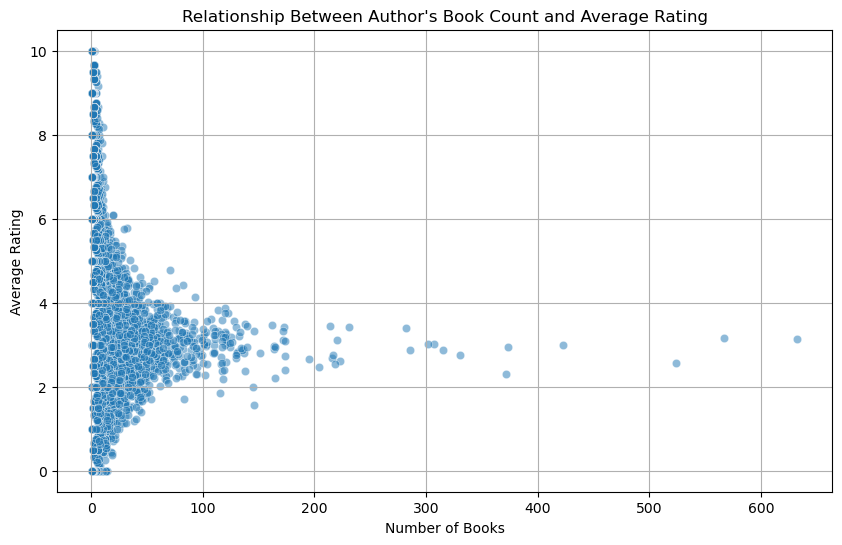

In [8]:
book_inf.plot_scatter1()

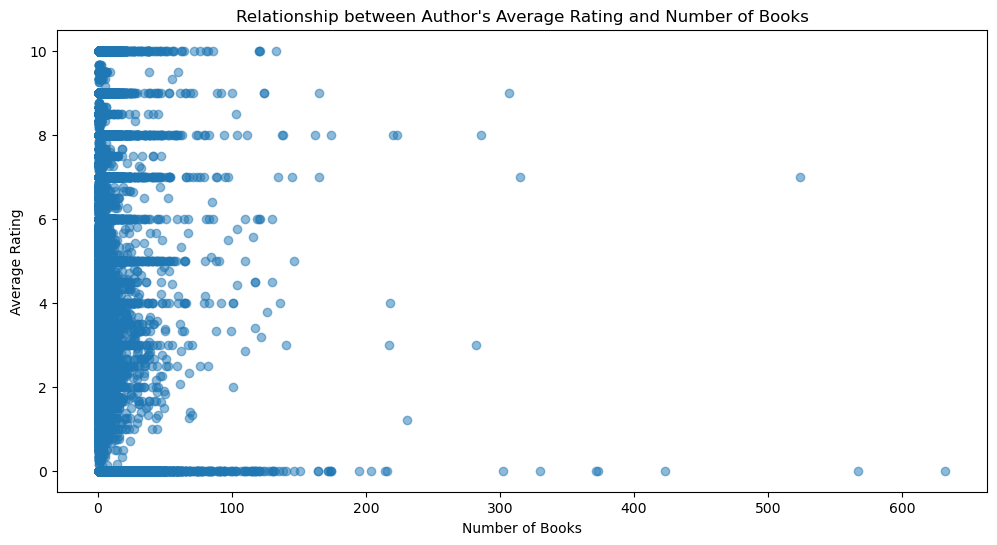

In [9]:
book_inf.plot_scatter2()

In [10]:
book_inf.predict1()

: 

In [ ]:
book_inf.predict2()

In [ ]:
book_inf.corr_rating_year()